In [0]:
!pip install kymatio
import kymatio
import pywt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import torch

from kymatio.scattering1d.filter_bank import scattering_filter_factory
from kymatio import Scattering1D
from kymatio.datasets import fetch_fsdd

In [0]:
!wget https://archive.physionet.org/challenge/2015/training.zip
!unzip training.zip
%cd training

In [0]:
sl = slice(10000,15000)
sig = torch.from_numpy(dat[sl]).float()

T = len(sig)
J = 6
Q = 8

scattering = Scattering1D(J, T, Q)
Sx = scattering.forward(sig)

meta = Scattering1D.compute_meta_scattering(J, Q)
order0 = (meta['order'] == 0)
order1 = (meta['order'] == 1)
order2 = (meta['order'] == 2)


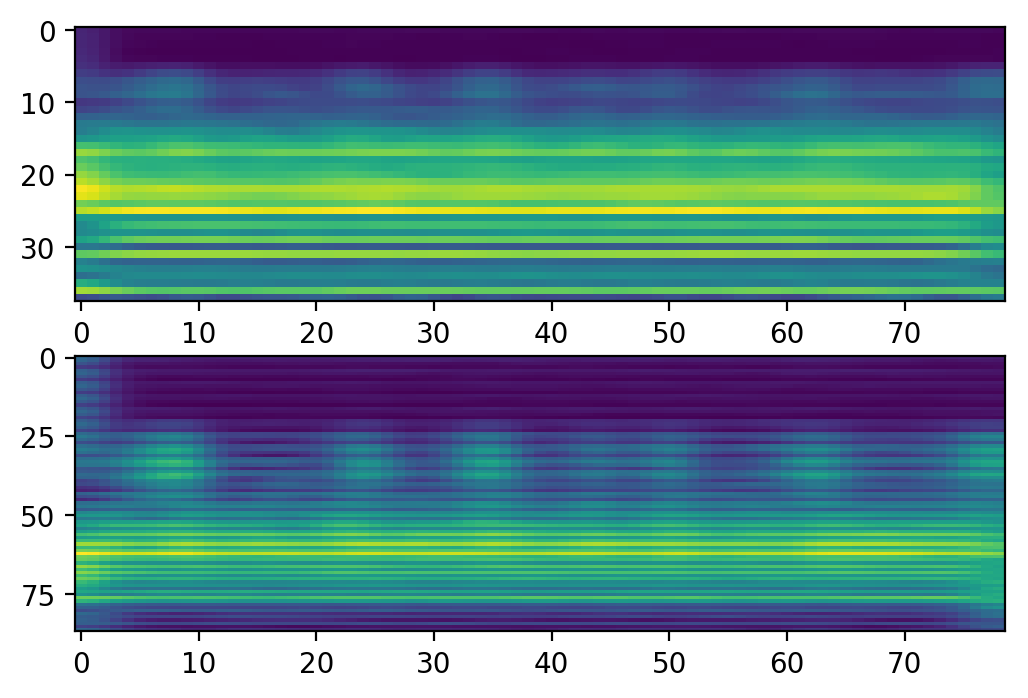

In [0]:
f,ax = plt.subplots(2,1,dpi=200)
ax[0].imshow(Sx[order1,:].numpy(), aspect='auto')
ax[1].imshow(Sx[order2,:].numpy(), aspect='auto')

In [0]:
print(Sx[order1,:].shape, '\n', Sx[order2,:].shape)

torch.Size([119, 31]) 
 torch.Size([358, 31])


In [0]:
import torch.cuda
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

sig = torch.from_numpy(dat[sl]).float().to(device)

scattering.cuda()
x_gpu = sig.cuda()
Sx_gpu = scattering(sig)